In [56]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

C:\Users\bttobi\AppData\Local\Temp/ipykernel_7636/3446636783.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'img/elo.png') #wczytywanie obrazka


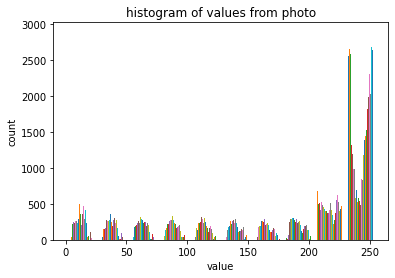

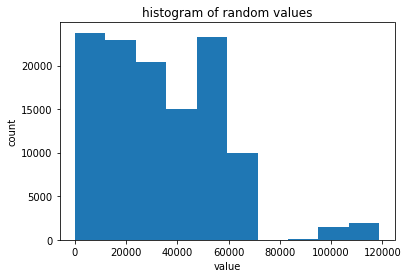

In [57]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

file = open('output.txt', 'w') 

image = imageio.imread(f'img/elo.png')
image = rgb2gray(image) 

threshold = 123
tempBuffer = []

for x in range(len(image)):
    for y in range(len(image[0])):
        if (image[x][y] < 0xff - threshold) and (image[x][y] > threshold):
            tempBuffer.append(int(image[x][y]) ^ x ^ y)


loop = int(len(tempBuffer)/2)
randomNumberBuffer = []

for i in range(0, loop):
    randomNumberBuffer.append(tempBuffer[i*2])
    randomNumberBuffer[i] = ((randomNumberBuffer[i]<<4) | (int(tempBuffer[2*i+1]) & 0x0f))
    file.write(str(randomNumberBuffer[i]))


file.close()

# plt.xlim([min(len(image)*len(image[0]))-5, max(len(image)*len(image[0]))+5])
# plt.hist(image)
# plt.title('histogram of values from photo')
# plt.xlabel('value')
# plt.ylabel('count')
# plt.show()

plt.xlim([min(randomNumberBuffer)-5, max(randomNumberBuffer)+5])
plt.hist(randomNumberBuffer)
plt.title('histogram of random values')
plt.xlabel('value')
plt.ylabel('count')
plt.show()
